In [1]:
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mean-Variance Analysis - Minimum Variance

Mean-variance analysis is a mathematical framework that examplifies the trade-off between return and risk. It is used to create diversified portfolios based on investors’ expectation. There are one main approach used in this report. We have the minimum volatility portfolio that concentrates on minimizing the risk of the portfolio. Mimimum variance portfolio can help us compare the correlation of simple sample covariance and covariance generated using cosine similarity distances.

In [3]:
returns_data = pd.read_csv('../data/returns_2018_top5_SIC.csv', 
                      parse_dates = ['DATE'], 
                      usecols = ["trt1m", "CIK", "name", "DATE"])

In [5]:
# TAKE OUT THE DATA before 2019 and reset index
#end_date = pd.to_datetime('2019-01-01')
#returns = returns_data.loc[(returns_data['DATE'] < end_date)]

# drop the missing value
returns = returns_data.dropna()
# group the data by name and date
group_returns = returns.groupby(['name', 'DATE'])
# calculate the percentage return
group_returns_pct = group_returns.agg({"trt1m": (lambda x:  x/100)})
r_selected = group_returns_pct.unstack()
# drop the first index
r_selected.columns = r_selected.columns.droplevel(0)

In [7]:
# there are some rows containing more than one float number (array of multiple returns)
for i in range(len(r_selected)):
    if type(r_selected.iloc[i,1]) == np.ndarray:
        r_selected = r_selected.drop(index = r_selected.index[i])
# convert object to float
r_selected = r_selected.astype(float)
# drop missing values rows
r_selected = r_selected.dropna()
# get the mean of all 
mu = r_selected.mean(axis = 1)
# compute the covariance matrix 
cov = r_selected.T.cov()

### Cosine Similarity Distances

In [8]:
df = pd.read_csv('../data/preprocessed.csv',
                 usecols = ['reportingDate', 'name', 'CIK',
                           'coDescription_stopwords', 'SIC', 'SIC_desc'])
df = df.set_index(df.name)

#### Words Count
For this cosine similarity analysis, we generate sequences of 2 to 4 words as one term and only select the top 600 terms by frequency.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorizer = CountVectorizer(ngram_range = (2,4), 
                             max_features = 600)

count_data = Vectorizer.fit_transform(df['coDescription_stopwords'])
wordsCount = pd.DataFrame(count_data.toarray(),columns=Vectorizer.get_feature_names())
wordsCount = wordsCount.set_index(df['name'])
wordsCount

/Users/lulu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability make,accounting standard,acquire property,act act,act amended,additional information,adequately capitalized,adverse effect,adverse effect business,adverse event,...,wa million,weighted average,well capitalized,wholly owned,wholly owned subsidiary,wide range,within day,working interest,year ended,year ended december
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,5,0
SALESFORCE COM INC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPLUNK INC,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"OKTA, INC.",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
VEEVA SYSTEMS INC,0,12,0,1,4,1,0,7,4,0,...,18,4,0,0,0,0,1,0,102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
"CYCLACEL PHARMACEUTICALS, INC.",0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
ZOETIS INC.,0,17,0,0,0,12,0,3,0,0,...,20,5,0,1,1,0,2,0,84,83


#### Cosine Similarity Computation

In [10]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = pd.DataFrame(cosine_similarity(wordsCount, wordsCount))
cosine_sim = cosine_sim.set_index(df['name'])
cosine_sim.columns = df['name']
cosine_sim

name,"MONGODB, INC.",SALESFORCE COM INC,SPLUNK INC,"OKTA, INC.",VEEVA SYSTEMS INC,AUTODESK INC,"INTERNATIONAL WESTERN PETROLEUM, INC.","DAYBREAK OIL & GAS, INC.","ETERNAL SPEECH, INC.","ETERNAL SPEECH, INC.",...,OMEGA HEALTHCARE INVESTORS INC,TABLEAU SOFTWARE INC,HORIZON PHARMA PLC,MERRIMACK PHARMACEUTICALS INC,"REVEN HOUSING REIT, INC.","AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.","CYCLACEL PHARMACEUTICALS, INC.",ZOETIS INC.,"STAG INDUSTRIAL, INC.",EQUINIX INC
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",1.000000,0.445455,0.610272,0.620961,0.500762,0.338268,0.065380,0.052345,0.000000,0.000000,...,0.050935,0.630465,0.436327,0.143385,0.066598,0.135839,0.144678,0.189609,0.178397,0.102958
SALESFORCE COM INC,0.445455,1.000000,0.635969,0.455189,0.196053,0.418546,0.043515,0.064999,0.000000,0.000000,...,0.029326,0.492079,0.300027,0.133831,0.201221,0.201230,0.145089,0.075038,0.277952,0.354856
SPLUNK INC,0.610272,0.635969,1.000000,0.665648,0.274023,0.373142,0.019112,0.073553,0.000000,0.000000,...,0.018032,0.569939,0.330028,0.116923,0.109538,0.142041,0.128467,0.136418,0.194072,0.273502
"OKTA, INC.",0.620961,0.455189,0.665648,1.000000,0.195672,0.399874,0.013240,0.093942,0.000000,0.000000,...,0.013905,0.579884,0.541775,0.163709,0.109948,0.144051,0.170361,0.111937,0.163588,0.074624
VEEVA SYSTEMS INC,0.500762,0.196053,0.274023,0.195672,1.000000,0.079927,0.074096,0.030179,0.075713,0.075713,...,0.424046,0.280852,0.153335,0.083683,0.128762,0.211695,0.060273,0.501041,0.332207,0.064207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0.135839,0.201230,0.142041,0.144051,0.211695,0.106627,0.027594,0.048087,0.000000,0.000000,...,0.284525,0.114080,0.075274,0.048741,0.578793,1.000000,0.039971,0.136184,0.471651,0.042298
"CYCLACEL PHARMACEUTICALS, INC.",0.144678,0.145089,0.128467,0.170361,0.060273,0.094262,0.010770,0.025407,0.000000,0.000000,...,0.015318,0.193458,0.462759,0.683597,0.047288,0.039971,1.000000,0.035694,0.080139,0.013121
ZOETIS INC.,0.189609,0.075038,0.136418,0.111937,0.501041,0.069267,0.039015,0.022235,0.065917,0.065917,...,0.159082,0.327556,0.148224,0.051060,0.163391,0.136184,0.035694,1.000000,0.207232,0.031911


### Perform Mean-Variance Analysis
We only use the Pharmaceutical Preparations industry data to generate portfolio based on Mean-Variance Analysis.

In [11]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting

In [12]:
# get the names of the companies in the pharmaceutical preparations industry
Pharm = df[df.SIC == 2834]
Pharm_list = Pharm.index

In [13]:
# get the companies name that match return data and business description data
SET = (set(Pharm_list) & set(r_selected.index))
LIST = [*SET, ]

#### Mean and Covariance for Returns in the Pharmaceutical Preparations Industry

In [14]:
mu_Pharm = mu[LIST]

In [15]:
tmp = cov[LIST].T
cov_Pharm = tmp[LIST]

#### Cosine Similarity Distances in the Pharmaceutical Preparations Industry

In [16]:
tmp = cosine_sim[LIST].drop_duplicates().T
Pharm_cos_sim = tmp[LIST].drop_duplicates()

#### Covariance for Cosine Similarity

In [17]:
cos_sim_sd = pd.DataFrame(np.sqrt(np.diag(np.diagonal(cov_Pharm))))
cos_sim_sd = cos_sim_sd.set_index(cov_Pharm.index)
cos_sim_sd.columns = cov_Pharm.index

In [18]:
cos_sim_cov = pd.DataFrame((np.dot(np.dot(cos_sim_sd, Pharm_cos_sim),cos_sim_sd)))

### Minmum Volatility Portfolio Weights - Cosine Similarity Estimates

#### Comparing sample mean and covariance from cosine similarity

/Users/lulu/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


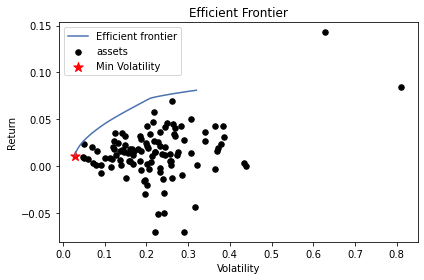

In [24]:
ef1 = EfficientFrontier(mu_Pharm, cos_sim_cov, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_Pharm, cos_sim_cov, weight_bounds=(0, 0.2))
# max sharpe ratio
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier")
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Cos_Sim.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility

In [25]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.2%
Annual volatility: 3.0%
Sharpe Ratio: -0.29


In [26]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        print(company, weight)

PACIRA PHARMACEUTICALS, INC. 0.03308
XENCOR INC 0.0433
HERON THERAPEUTICS, INC. /DE/ 0.01409
MERCK & CO., INC. 0.1978
BELLEROPHON THERAPEUTICS, INC. 0.00621
BRISTOL MYERS SQUIBB CO 0.09943
PERRIGO CO PLC 0.0173
PFIZER INC 0.14718
ZOETIS INC. 0.2
JOHNSON & JOHNSON 0.19918
BIOMARIN PHARMACEUTICAL INC 0.04242


In [27]:
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.dfi.export('max_sharpe_cos_sim.png')

[0416/201430.379836:INFO:headless_shell.cc(659)] Written to file /var/folders/6t/0lh6qmkn1zg8fhlp984cpxrr0000gn/T/tmpf0o08ytd/temp.png.


In [28]:
min_vol

,Company_Name,Weight
0,"PACIRA PHARMACEUTICALS, INC.",0.03308
1,XENCOR INC,0.04330
2,"HERON THERAPEUTICS, INC. /DE/",0.01409
3,"MERCK & CO., INC.",0.19780
4,"BELLEROPHON THERAPEUTICS, INC.",0.00621
5,BRISTOL MYERS SQUIBB CO,0.09943
6,PERRIGO CO PLC,0.01730
7,PFIZER INC,0.14718
8,ZOETIS INC.,0.20000
9,JOHNSON & JOHNSON,0.19918
